In [616]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [617]:

path = '../../../Atliq Marts Challenge'
fact_order_lines_df=pd.read_csv(path+"/fact_order_lines.csv")
# fact_orders_aggregate_df=pd.read_csv("Atliq Marts Challenge/fact_orders_aggregate.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")
dim_customers=pd.read_csv(path+"/dim_customers.csv")
dim_products=pd.read_csv(path+"/dim_products.csv")
dim_targets_orders=pd.read_csv(path+"/dim_targets_orders.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")

dim_date = dim_date.rename(columns={'date': 'agreed_delivery_date','mmm_yy': 'agreed_delivery_mmm_yy','week_no': 'agreed_delivery_week_no'})


In [618]:
# result =  pd.concat([fact_order_lines_df, fact_orders_aggregate_df], axis=1,join="outer")
# result =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
# esult =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
result =pd.merge( fact_order_lines_df ,dim_customers , how="outer",on=["customer_id"])
result =pd.merge( result ,dim_products , how="outer",on=["product_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_date , how="outer",on=["agreed_delivery_date"])

In [619]:
train_SC.columns = [col.lower().replace(' ', '_') for col in train_SC.columns]
train_SC.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
train_SC.rename(columns=lambda x: x.replace("%", "_percent"), inplace=True)

In [620]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 0 to 57096
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 57096 non-null  object 
 1   order_placement_date     57096 non-null  object 
 2   customer_id              57096 non-null  float64
 3   product_id               57096 non-null  float64
 4   order_qty                57096 non-null  float64
 5   agreed_delivery_date     57097 non-null  object 
 6   actual_delivery_date     57096 non-null  object 
 7   delivery_qty             57096 non-null  float64
 8   in_full                  57096 non-null  float64
 9   on_time                  57096 non-null  float64
 10  on_time_in_full          57096 non-null  float64
 11  customer_name            57096 non-null  object 
 12  city                     57096 non-null  object 
 13  product_name             57096 non-null  object 
 14  category              

In [622]:
df = train_SC[(train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

df1 = train_SC[(train_SC['product_id'] == 25891201)] 
df2 = train_SC[(train_SC['product_id'] == 25891202)] 
df3 = train_SC[(train_SC['product_id'] == 25891203)] 


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9567 entries, 0 to 57001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 9567 non-null   object 
 1   order_placement_date     9567 non-null   object 
 2   customer_id              9567 non-null   float64
 3   product_id               9567 non-null   float64
 4   order_qty                9567 non-null   float64
 5   agreed_delivery_date     9567 non-null   object 
 6   actual_delivery_date     9567 non-null   object 
 7   delivery_qty             9567 non-null   float64
 8   in_full                  9567 non-null   float64
 9   on_time                  9567 non-null   float64
 10  on_time_in_full          9567 non-null   float64
 11  customer_name            9567 non-null   object 
 12  city                     9567 non-null   object 
 13  product_name             9567 non-null   object 
 14  category               

In [624]:
# Convert 'actual_delivery_date' to datetime format

df['agreed_delivery_date_formatted'] = pd.to_datetime(df['agreed_delivery_date'], format='%d-%b-%y')
df = df.sort_values(by='agreed_delivery_date_formatted')


df1['agreed_delivery_date_formatted'] = pd.to_datetime(df1['agreed_delivery_date'], format='%d-%b-%y')
df1 = df1.sort_values(by='agreed_delivery_date_formatted')
df2['agreed_delivery_date_formatted'] = pd.to_datetime(df2['agreed_delivery_date'], format='%d-%b-%y')
df2 = df2.sort_values(by='agreed_delivery_date_formatted')
df3['agreed_delivery_date_formatted'] = pd.to_datetime(df3['agreed_delivery_date'], format='%d-%b-%y')
df3 = df3.sort_values(by='agreed_delivery_date_formatted')


In [625]:
dfx = train_SC[((train_SC['city'] == 'Ahmedabad') & train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

dfx1 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891201)] 
dfx2 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891202)] 
dfx3 = train_SC[(train_SC['city'] == 'Ahmedabad') &(train_SC['product_id'] == 25891203)] 


In [626]:
# Convert 'actual_delivery_date' to datetime format

dfx['agreed_delivery_date_formatted'] = pd.to_datetime(dfx['agreed_delivery_date'], format='%d-%b-%y')
dfx = dfx.sort_values(by='agreed_delivery_date_formatted')


dfx1['agreed_delivery_date_formatted'] = pd.to_datetime(dfx1['agreed_delivery_date'], format='%d-%b-%y')
dfx1 = dfx1.sort_values(by='agreed_delivery_date_formatted')
dfx2['agreed_delivery_date_formatted'] = pd.to_datetime(dfx2['agreed_delivery_date'], format='%d-%b-%y')
dfx2 = dfx2.sort_values(by='agreed_delivery_date_formatted')
dfx3['agreed_delivery_date_formatted'] = pd.to_datetime(dfx3['agreed_delivery_date'], format='%d-%b-%y')
dfx3 = dfx3.sort_values(by='agreed_delivery_date_formatted')

In [627]:
dfz = train_SC[((train_SC['customer_id'] == 789201) & train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 
# df = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

dfz1 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891201)] 
dfz2 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891202)] 
dfz3 = train_SC[(train_SC['customer_id'] == 789201) &(train_SC['product_id'] == 25891203)]

In [628]:
# Convert 'actual_delivery_date' to datetime format

dfz['agreed_delivery_date_formatted'] = pd.to_datetime(dfz['agreed_delivery_date'], format='%d-%b-%y')
dfz = dfz.sort_values(by='agreed_delivery_date_formatted')


dfz1['agreed_delivery_date_formatted'] = pd.to_datetime(dfz1['agreed_delivery_date'], format='%d-%b-%y')
dfz1 = dfz1.sort_values(by='agreed_delivery_date_formatted')
dfz2['agreed_delivery_date_formatted'] = pd.to_datetime(dfz2['agreed_delivery_date'], format='%d-%b-%y')
dfz2 = dfz2.sort_values(by='agreed_delivery_date_formatted')
dfz3['agreed_delivery_date_formatted'] = pd.to_datetime(dfz3['agreed_delivery_date'], format='%d-%b-%y')
dfz3 = dfz3.sort_values(by='agreed_delivery_date_formatted')

In [629]:
 #Split data into features and target variable (if applicable)
def init_X_y(df,attribute):
    df = df.groupby(attribute)['order_qty'].sum().reset_index()[1:-1]
# Calculate moving average
    df['shift1'] = df['order_qty'].rolling(window=1).mean().shift(1)
    df['shift2'] = df['order_qty'].rolling(window=1).mean().shift(2)
    df['shift3'] = df['order_qty'].rolling(window=1).mean().shift(3)
    df['shift4'] = df['order_qty'].rolling(window=1).mean().shift(4)
    df['shift5'] = df['order_qty'].rolling(window=1).mean().shift(5)
    df['shift6'] = df['order_qty'].rolling(window=1).mean().shift(6)
    df['shift7'] = df['order_qty'].rolling(window=1).mean().shift(7)


    df['moving_avg2'] = df['order_qty'].rolling(window=2).mean().shift(1)
    df['moving_avg3'] = df['order_qty'].rolling(window=3).mean().shift(1)
    df['moving_avg4'] = df['order_qty'].rolling(window=4).mean().shift(1)
    df['moving_avg5'] = df['order_qty'].rolling(window=5).mean().shift(1)
    df['moving_avg6'] = df['order_qty'].rolling(window=6).mean().shift(1)
    df['moving_avg7'] = df['order_qty'].rolling(window=7).mean().shift(1)
    df['moving_avg8'] = df['order_qty'].rolling(window=8).mean().shift(1)
    
    df = df[8:]
    # tmp = pd.get_dummies(df[attribute],drop_first=True)
    # df.drop([attribute],axis=1,inplace=True)
    # df = pd.concat([df,tmp],axis=1)
    # df.drop(['index'],axis=1,inplace=True)
    df.drop([attribute],axis=1,inplace=True)
    
    X= df.drop(columns=['order_qty']) 
    y = df['order_qty']
    return df,X,y

df,X,y = init_X_y(dfz,"agreed_delivery_week_no")
df_Old,X,y = init_X_y(dfz,"agreed_delivery_date_formatted")
# Split data into train and test sets

# Split the data into train and test sets, leaving out the last 200 rows
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]





In [630]:
X_train

,shift1,shift2,shift3,shift4,shift5,shift6,shift7,moving_avg2,moving_avg3,moving_avg4,moving_avg5,moving_avg6,moving_avg7,moving_avg8
9,8878.0,10377.0,9604.0,9817.0,12105.0,11933.0,10743.0,9627.5,9619.666667,9669.00,10156.2,10452.333333,10493.857143,10405.125
10,9421.0,8878.0,10377.0,9604.0,9817.0,12105.0,11933.0,9149.5,9558.666667,9570.00,9619.4,10033.666667,10305.000000,10359.750
11,10504.0,9421.0,8878.0,10377.0,9604.0,9817.0,12105.0,9962.5,9601.000000,9795.00,9756.8,9766.833333,10100.857143,10329.875
12,11767.0,10504.0,9421.0,8878.0,10377.0,9604.0,9817.0,11135.5,10564.000000,10142.50,10189.4,10091.833333,10052.571429,10309.125
13,14772.0,11767.0,10504.0,9421.0,8878.0,10377.0,9604.0,13269.5,12347.666667,11616.00,11068.4,10953.166667,10760.428571,10642.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,9669.0,10491.0,11789.0,9293.0,13287.0,9415.0,12192.0,10080.0,10649.666667,10310.50,10905.8,10657.333333,10876.571429,10689.000
148,11067.0,9669.0,10491.0,11789.0,9293.0,13287.0,9415.0,10368.0,10409.000000,10754.00,10461.8,10932.666667,10715.857143,10900.375
149,10874.0,11067.0,9669.0,10491.0,11789.0,9293.0,13287.0,10970.5,10536.666667,10525.25,10778.0,10530.500000,10924.285714,10735.625
150,12709.0,10874.0,11067.0,9669.0,10491.0,11789.0,9293.0,11791.5,11550.000000,11079.75,10962.0,11099.833333,10841.714286,11147.375


In [631]:
def regressionmodel(model_orderitemquantity,xorderitemquantity_train, xorderitemquantity_test,yorderitemquantity_train,yorderitemquantity_test):
    model_orderitemquantity=model_orderitemquantity.fit(xorderitemquantity_train,yorderitemquantity_train)#Fitting train data for Number of products per order
    yorderitemquantity_pred=model_orderitemquantity.predict(xorderitemquantity_test)#predicting Number of products per order with test data
    print('Model parameter used are:',model_orderitemquantity) #Printing the model to see which parameters are used
    print("MAE of Total amount per order is         :", metrics.mean_absolute_error(yorderitemquantity_test,yorderitemquantity_pred))  #Printing mean absolute error for predicting Number of products per order
    print("RMSE of Total amount per order is        :",np.sqrt(metrics.mean_squared_error(yorderitemquantity_test,yorderitemquantity_pred)))#Printing Root mean squared error for predicting Number of products per order

    return yorderitemquantity_test,yorderitemquantity_pred


In [632]:
model_orderitemquantity=LinearRegression()
y_test,y_pred=regressionmodel(model_orderitemquantity,X_train, X_test,y_train,y_test)
dfx = pd.DataFrame({"Actual": y_test, "Predict": y_pred})

Model parameter used are: LinearRegression()
MAE of Total amount per order is         : 1336.2227086475425
RMSE of Total amount per order is        : 1567.8312195394697


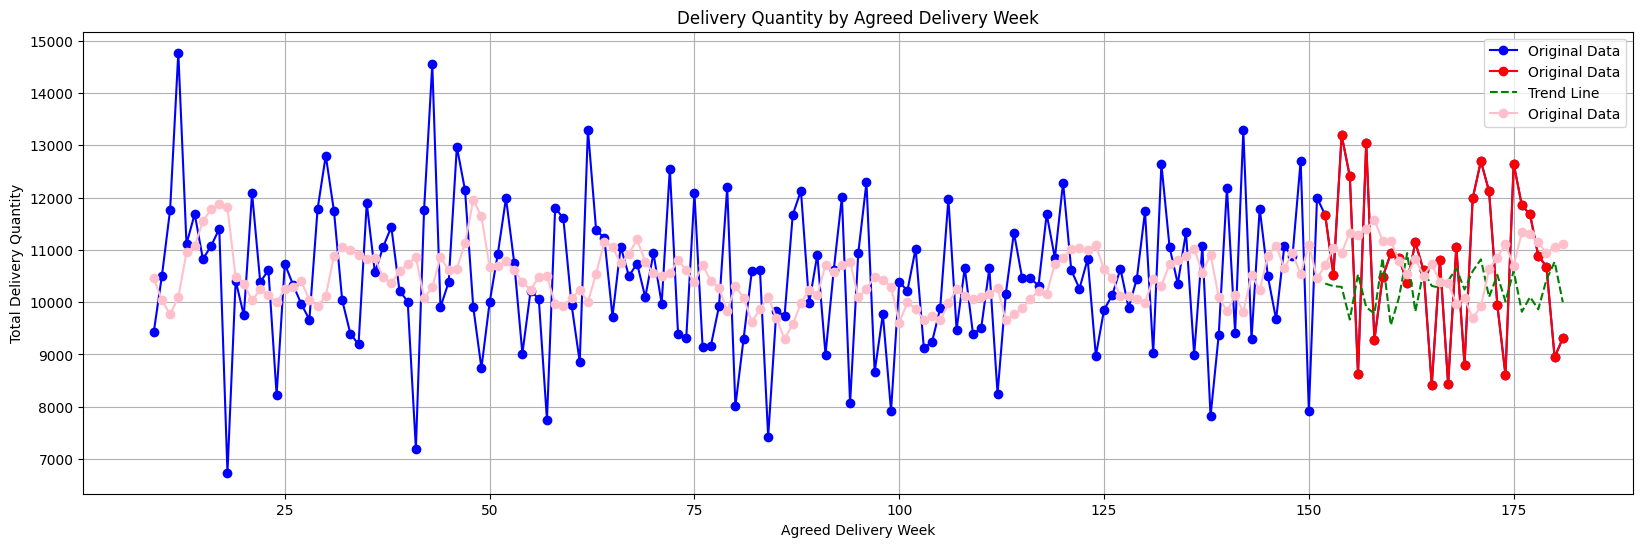

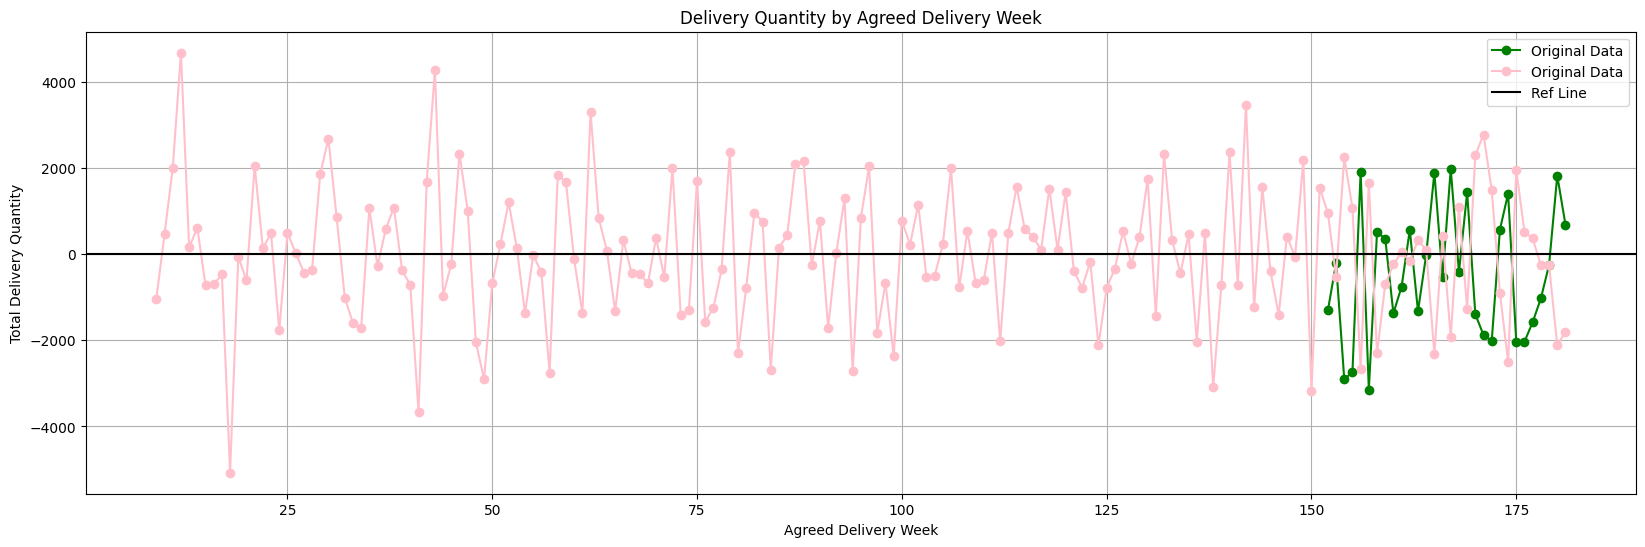

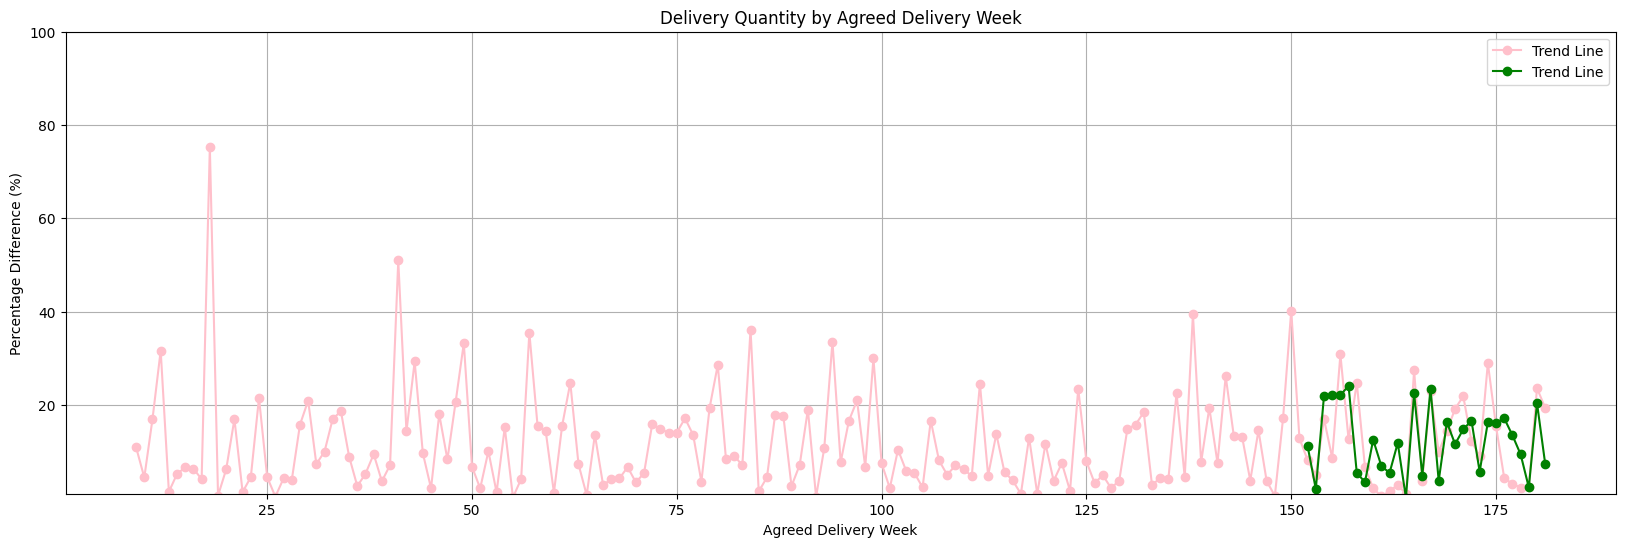

In [633]:

def plot(dfz1_weekly_sum,df):
    plt.figure(figsize=(20, 6))
    plt.plot(dfz1_weekly_sum['order_qty'], color='blue', marker='o', linestyle='-', label='Original Data')  
    # Original data
    plt.plot(df['Actual'], color='red', marker='o', linestyle='-', label='Original Data')
    plt.plot(df['Predict'], color='green', linestyle='--', label='Trend Line')
    plt.plot(dfz1_weekly_sum['moving_avg6'], color='pink', marker='o', linestyle='-', label='Original Data')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()
    
    plt.figure(figsize=(20, 6))
    plt.plot(df['Predict']-df['Actual'], color='green', marker='o', linestyle='-', label='Original Data')  
    plt.plot(dfz1_weekly_sum['order_qty']-dfz1_weekly_sum['moving_avg6'], color='pink', marker='o', linestyle='-', label='Original Data') 
    plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Total Delivery Quantity')
    plt.grid(True)
    plt.legend()  # Show legend
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.plot((abs(dfz1_weekly_sum['moving_avg6'] - dfz1_weekly_sum['order_qty']) / dfz1_weekly_sum['order_qty']) * 100, color='pink', marker='o', linestyle='-', label='Trend Line')
    plt.plot((abs(df['Predict'] - df['Actual']) / df['Actual']) * 100, color='green', marker='o', linestyle='-', label='Trend Line')

    plt.title('Delivery Quantity by Agreed Delivery Week')
    plt.xlabel('Agreed Delivery Week')
    plt.ylabel('Percentage Difference (%)')  # Updated ylabel
    plt.grid(True)
    plt.legend()  # Show legend
    plt.ylim(1, 100)  # Set y-axis limits
    plt.show()

plot(df_Old,dfx)

In [634]:
model_orderitemquantity = tree.DecisionTreeRegressor()
y_test,y_pred=regressionmodel(model_orderitemquantity,X_train, X_test,y_train,y_test)
dfx = pd.DataFrame({"Actual": y_test, "Predict": y_pred})

Model parameter used are: DecisionTreeRegressor()
MAE of Total amount per order is         : 2242.266666666667
RMSE of Total amount per order is        : 2611.558602316504


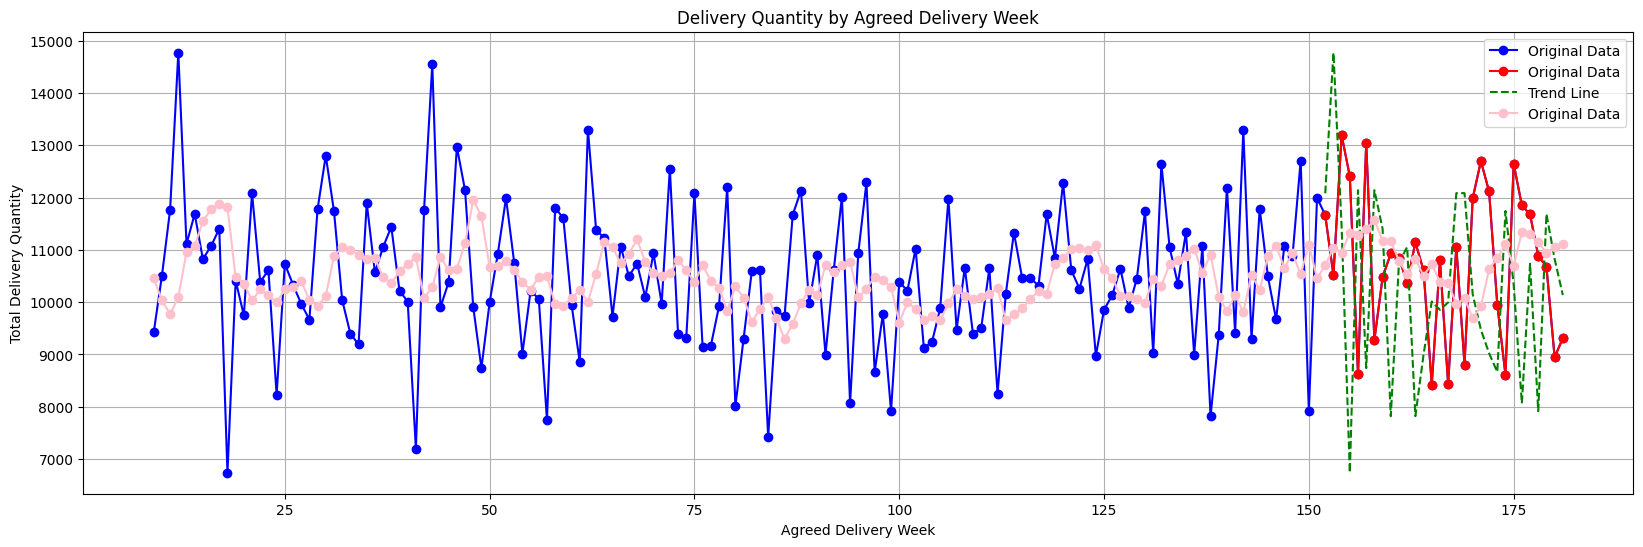

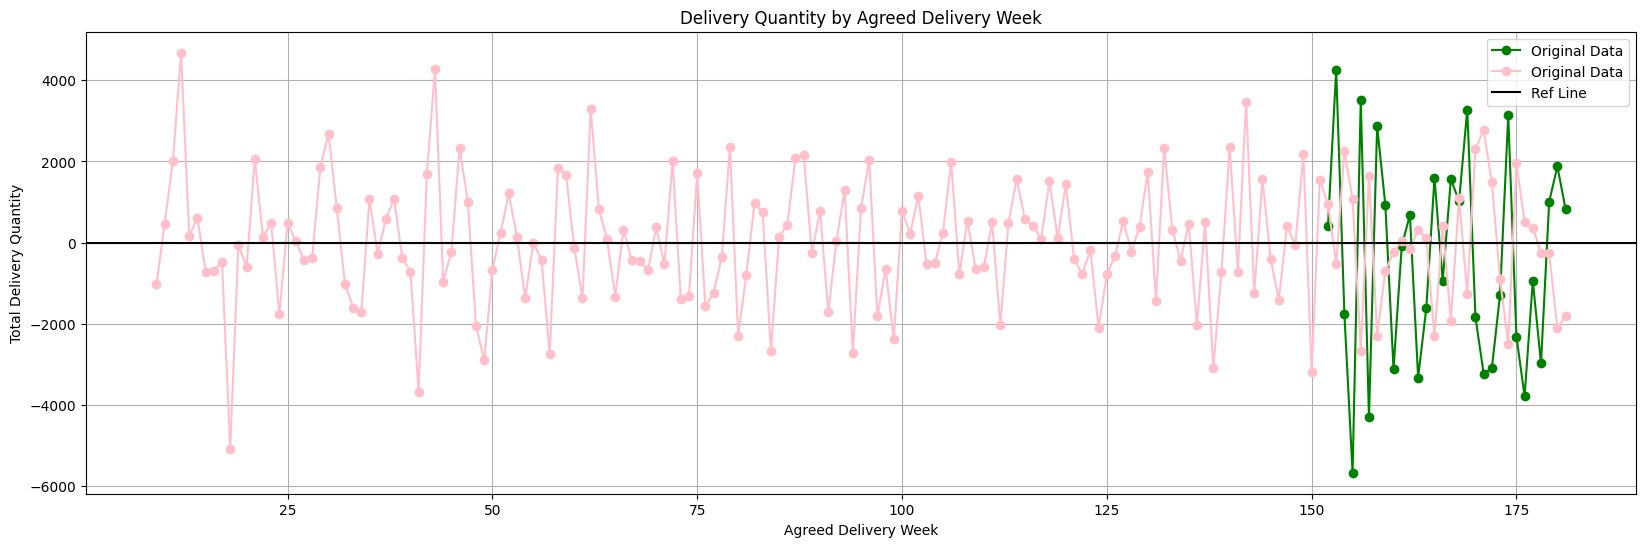

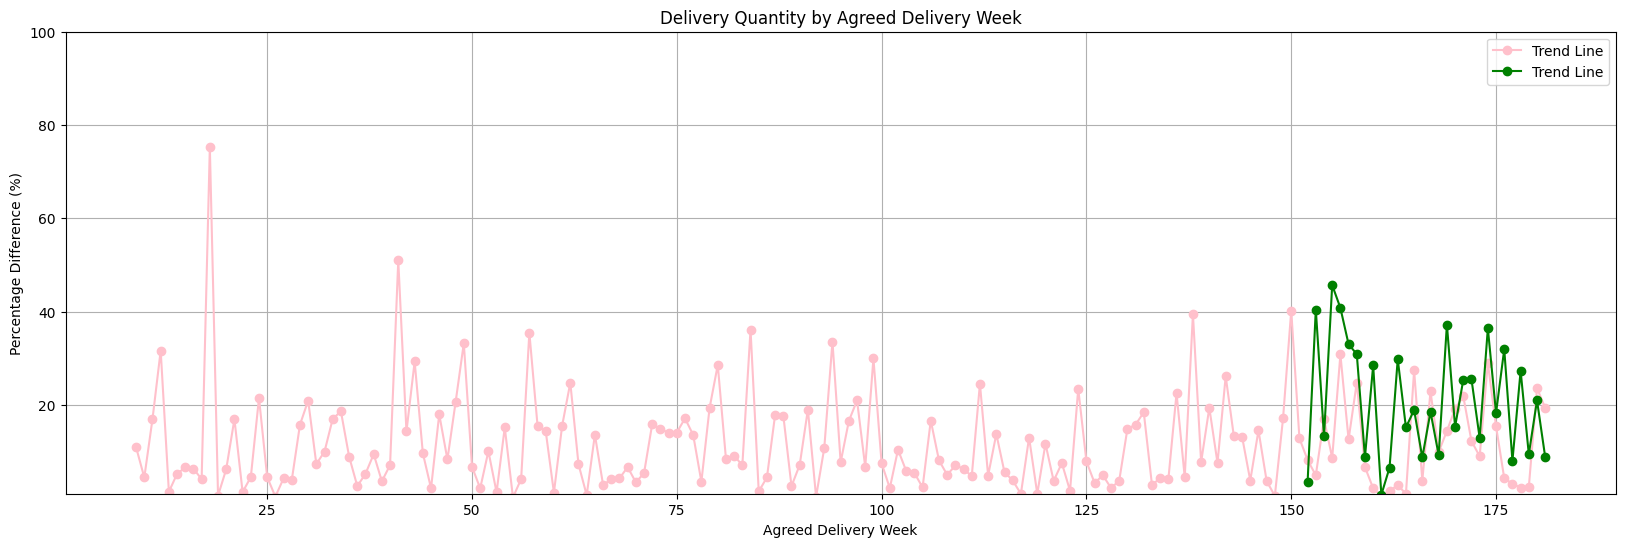

In [635]:
plot(df_Old,dfx)

Model parameter used are: RandomForestRegressor(max_depth=20, random_state=40)
MAE of Total amount per order is         : 1465.794666666667
RMSE of Total amount per order is        : 1746.3077691861765


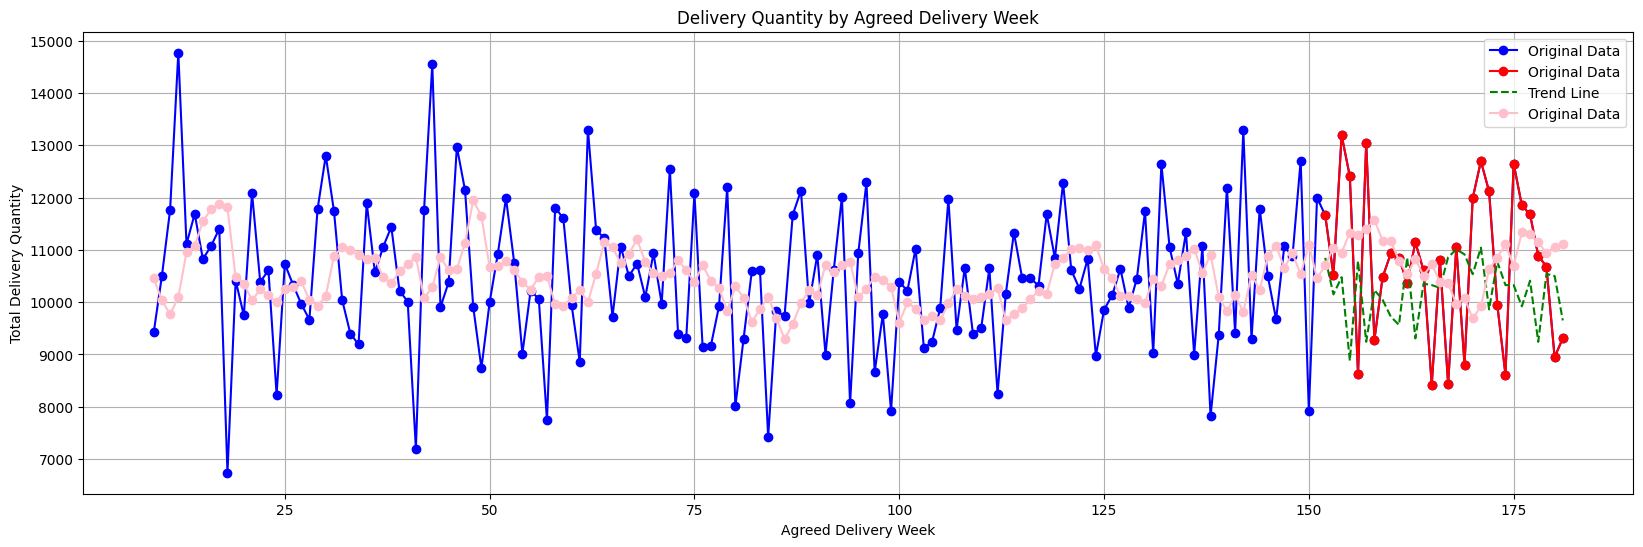

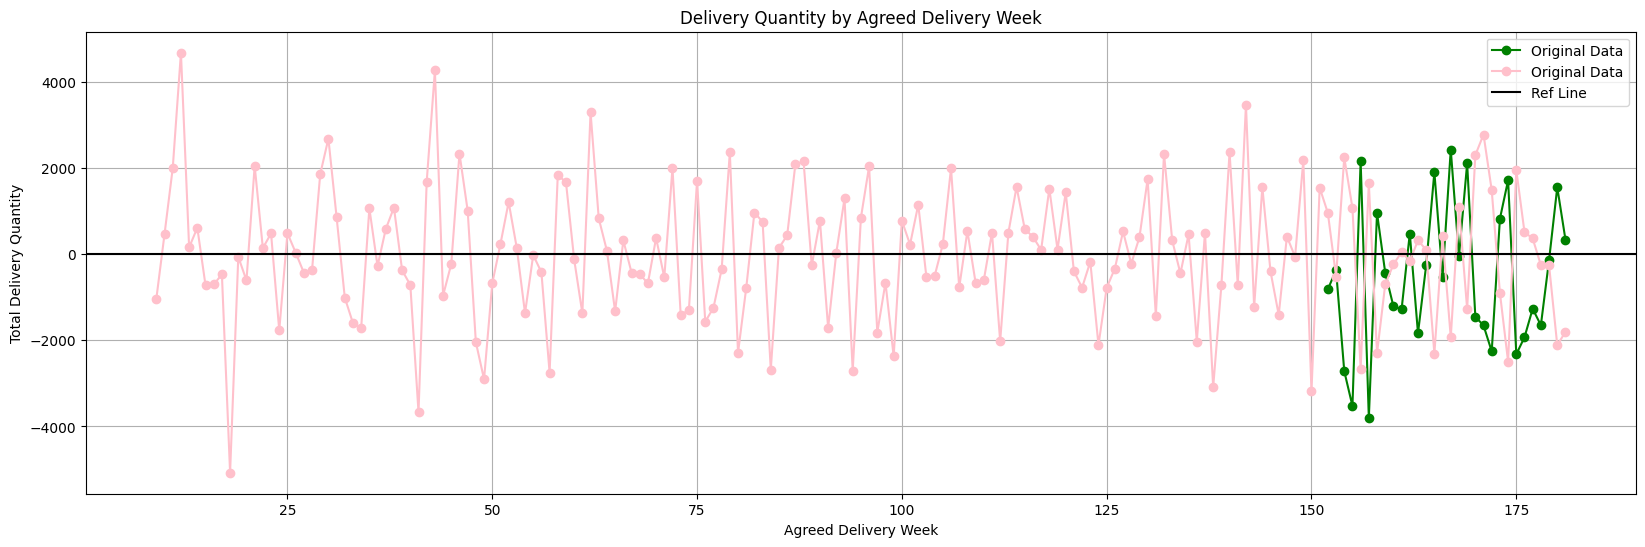

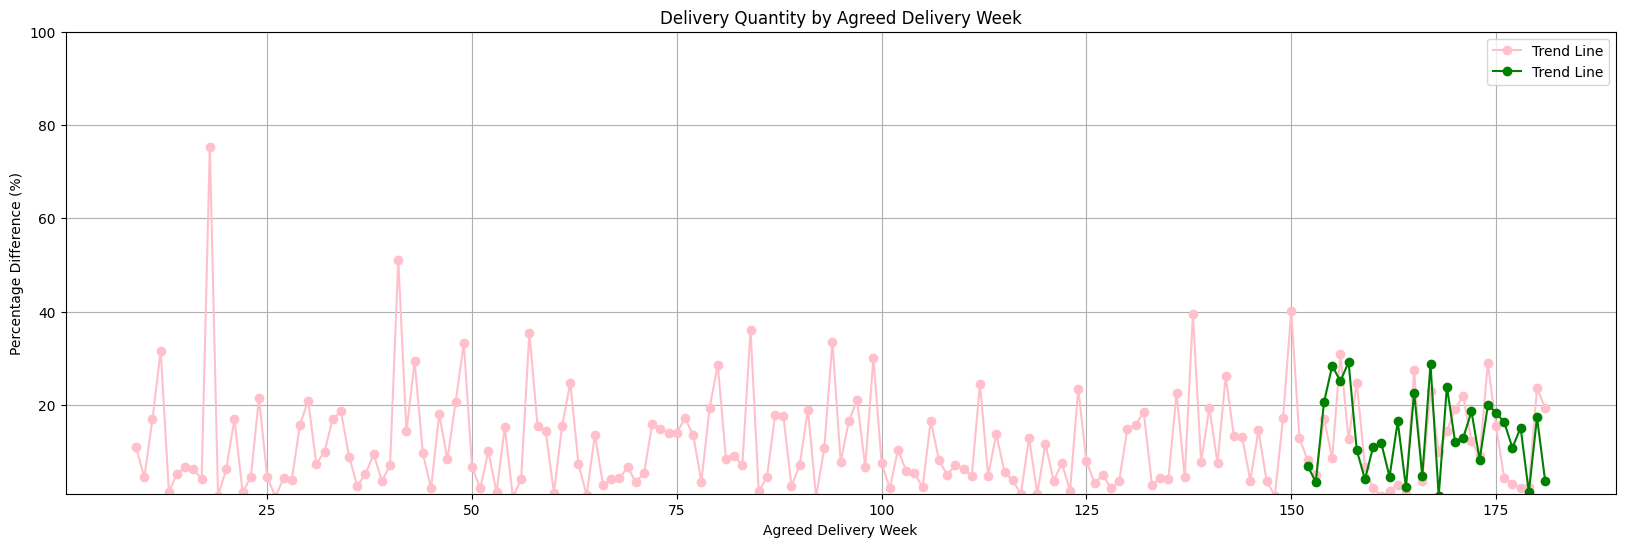

In [636]:
model_orderitemquantity = RandomForestRegressor(n_estimators=100,max_depth=20, random_state=40)
y_test,y_pred=regressionmodel(model_orderitemquantity,X_train, X_test,y_train,y_test)
dfx = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
plot(df_Old,dfx)